In [ ]:
# CNN model for MNIST and CIFAR-10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load datasets
(mnist_X_train, mnist_y_train), (mnist_X_test, mnist_y_test) = datasets.mnist.load_data()
(cifar_X_train, cifar_y_train), (cifar_X_test, cifar_y_test) = datasets.cifar10.load_data()

# Preprocess MNIST
mnist_X_train = mnist_X_train.reshape(-1, 28, 28, 1) / 255.0
mnist_X_test = mnist_X_test.reshape(-1, 28, 28, 1) / 255.0
mnist_y_train = tf.keras.utils.to_categorical(mnist_y_train, 10)
mnist_y_test = tf.keras.utils.to_categorical(mnist_y_test, 10)

# Preprocess CIFAR-10
cifar_X_train = cifar_X_train / 255.0
cifar_X_test = cifar_X_test / 255.0
cifar_y_train = tf.keras.utils.to_categorical(cifar_y_train, 10)
cifar_y_test = tf.keras.utils.to_categorical(cifar_y_test, 10)

# Define CNN model
def build_cnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Build and compile model for MNIST
mnist_model = build_cnn((28, 28, 1))
mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train MNIST model
mnist_history = mnist_model.fit(mnist_X_train, mnist_y_train, epochs=15, batch_size=64, validation_split=0.1)

# Build and compile model for CIFAR-10
cifar_model = build_cnn((32, 32, 3))
cifar_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CIFAR-10 model
cifar_history = cifar_model.fit(cifar_X_train, cifar_y_train, epochs=15, batch_size=64, validation_split=0.1)

# Evaluate
mnist_test_loss, mnist_test_acc = mnist_model.evaluate(mnist_X_test, mnist_y_test)
cifar_test_loss, cifar_test_acc = cifar_model.evaluate(cifar_X_test, cifar_y_test)




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8749 - loss: 0.4125 - val_accuracy: 0.9847 - val_loss: 0.0554
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9810 - loss: 0.0598 - val_accuracy: 0.9842 - val_loss: 0.0506
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0411 - val_accuracy: 0.9895 - val_loss: 0.0343
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9917 - loss: 0.0270 - val_accuracy: 0.9863 - val_loss: 0.0438
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9929 - loss: 0.0214 - val_accuracy: 0.9902 - val_loss: 0.0320
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0167 - val_accuracy: 0.9902 - val_loss: 0.0371
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9900 - val_loss: 0.0389
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9969 - loss: 0.0109 - val_accuracy: 0

In [ ]:
#loss function for both
print("MNIST Test Loss:", mnist_test_loss)
print("CIFAR-10 Test Loss:", cifar_test_loss)

MNIST Test Loss: 0.03287835791707039
CIFAR-10 Test Loss: 0.9656728506088257


In [ ]:
print("MNIST Test Accuracy:", mnist_test_acc)
print("CIFAR-10 Test Accuracy:", cifar_test_acc)



MNIST Test Accuracy: 0.9923999905586243
CIFAR-10 Test Accuracy: 0.7006000280380249


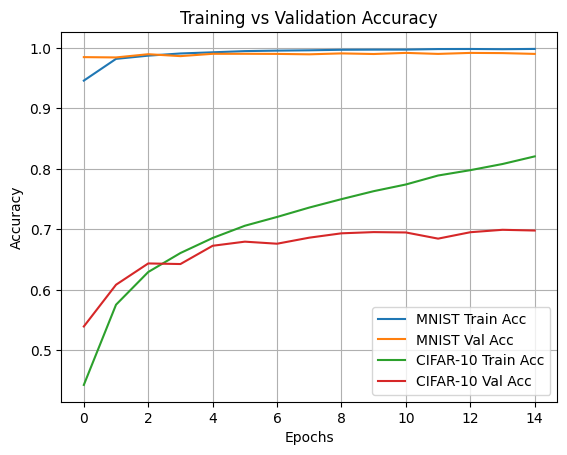

In [ ]:
# Plot training accuracy
plt.plot(mnist_history.history['accuracy'], label='MNIST Train Acc')
plt.plot(mnist_history.history['val_accuracy'], label='MNIST Val Acc')
plt.plot(cifar_history.history['accuracy'], label='CIFAR-10 Train Acc')
plt.plot(cifar_history.history['val_accuracy'], label='CIFAR-10 Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.savefig('2-layer CNN.png')
plt.show()

In [ ]:
# Classification

#MNIST Classifiation
import matplotlib.pyplot as plt
import numpy as np
image_index_mnist = 0

test_image_mnist = mnist_X_test[image_index_mnist]
true_label_mnist = np.argmax(mnist_y_test[image_index_mnist])

# Reshape the image to fit the model input (add a batch dimension)
test_image_input_mnist = np.expand_dims(test_image_mnist, axis=0)

# Make a prediction using the trained MNIST model
predictions_mnist = mnist_model.predict(test_image_input_mnist)

# Get the predicted class (the index with the highest probability)
predicted_label_mnist = np.argmax(predictions_mnist[0])

# Print the true and predicted labels for MNIST
print(f"True label (MNIST): {true_label_mnist}")
print(f"Predicted label (MNIST): {predicted_label_mnist}")

# Display the image for MNIST
plt.imshow(test_image_mnist.squeeze(), cmap='gray') # Use squeeze() to remove the channel dimension for grayscale
plt.title(f"True (MNIST): {true_label_mnist}, Predicted (MNIST): {predicted_label_mnist}")
plt.show()



#CIFAR-10 Classification
import matplotlib.pyplot as plt
import numpy as np

image_index = 0

# Get the image and its true label
test_image = cifar_X_test[image_index]
true_label = np.argmax(cifar_y_test[image_index])

# Reshape the image to fit the model input (add a batch dimension)
test_image_input = np.expand_dims(test_image, axis=0)

# Make a prediction using the trained CIFAR-10 model
predictions = cifar_model.predict(test_image_input)

# Get the predicted class (the index with the highest probability)
predicted_label = np.argmax(predictions[0])

# Define the class names for CIFAR-10 (replace with actual names if you have them)
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck']

# Print the true and predicted labels
print(f"True label: {cifar10_class_names[true_label]}")
print(f"Predicted label: {cifar10_class_names[predicted_label]}")

# Display the image
plt.imshow(test_image)
plt.title(f"True: {cifar10_class_names[true_label]}, Predicted: {cifar10_class_names[predicted_label]}")
plt.show()